<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/SelectFeature3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Dataset

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# generative regression dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=2)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=1)
# summarize
print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (670, 100) (670,)
Test: (330, 100) (330,)


# Correlation Feature Selection

Feature 0: 5.368584
Feature 1: 1.566624
Feature 2: 0.236732
Feature 3: 3.388985
Feature 4: 2.056797
Feature 5: 0.049078
Feature 6: 293.180588
Feature 7: 4.518362
Feature 8: 0.322056
Feature 9: 3.708477
Feature 10: 0.114445
Feature 11: 0.298357
Feature 12: 1.344983
Feature 13: 2.011087
Feature 14: 8.519665
Feature 15: 0.125895
Feature 16: 0.165482
Feature 17: 0.080711
Feature 18: 0.053044
Feature 19: 1.018474
Feature 20: 0.193852
Feature 21: 0.737906
Feature 22: 34.224565
Feature 23: 0.026552
Feature 24: 296.363764
Feature 25: 1.340994
Feature 26: 5.286970
Feature 27: 2.051134
Feature 28: 0.094554
Feature 29: 0.033993
Feature 30: 0.135794
Feature 31: 0.008228
Feature 32: 0.501513
Feature 33: 12.923386
Feature 34: 0.288883
Feature 35: 0.562624
Feature 36: 1.574279
Feature 37: 4.976176
Feature 38: 4.295759
Feature 39: 0.158423
Feature 40: 0.001658
Feature 41: 0.244266
Feature 42: 0.385002
Feature 43: 0.701786
Feature 44: 0.757261
Feature 45: 0.056633
Feature 46: 0.891275
Feature 47: 0.617

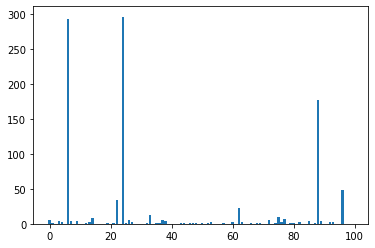

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

def select_feature(X_train, y_train, X_test):
  # configure to select all features
  fs = SelectKBest(score_func=f_regression, k='all')
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test, fs

X_train_fs, X_test_fs, fs = select_feature(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
  print('Feature %d: %f'% (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

# Mutual Information Feature Selection

Feature 0: 0.004781
Feature 1: 0.077062
Feature 2: 0.008502
Feature 3: 0.000000
Feature 4: 0.007299
Feature 5: 0.005391
Feature 6: 0.197879
Feature 7: 0.005893
Feature 8: 0.000000
Feature 9: 0.025730
Feature 10: 0.000000
Feature 11: 0.000000
Feature 12: 0.021203
Feature 13: 0.016562
Feature 14: 0.046674
Feature 15: 0.007196
Feature 16: 0.000000
Feature 17: 0.047186
Feature 18: 0.010420
Feature 19: 0.010053
Feature 20: 0.000000
Feature 21: 0.006820
Feature 22: 0.049997
Feature 23: 0.000000
Feature 24: 0.166759
Feature 25: 0.041085
Feature 26: 0.000000
Feature 27: 0.077396
Feature 28: 0.000000
Feature 29: 0.008724
Feature 30: 0.000000
Feature 31: 0.036081
Feature 32: 0.006974
Feature 33: 0.017426
Feature 34: 0.027997
Feature 35: 0.000000
Feature 36: 0.000000
Feature 37: 0.026869
Feature 38: 0.000000
Feature 39: 0.000000
Feature 40: 0.004438
Feature 41: 0.007363
Feature 42: 0.036565
Feature 43: 0.014667
Feature 44: 0.011853
Feature 45: 0.039146
Feature 46: 0.021186
Feature 47: 0.000000
Fe

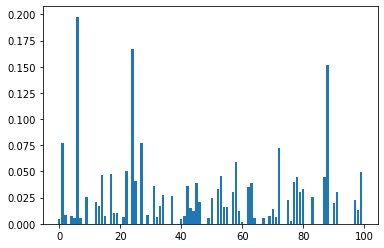

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot

def select_features(X_train, y_train, X_test):
  # configure to select all features
  fs = SelectKBest(score_func=mutual_info_regression, k='all')
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train, X_test, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
  print('Feature %d: %f'%(i, fs.scores_[i]))
# Plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

# Model Built Using All Features

In [14]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10,noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=1)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluation the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAEL %.3f' %mae)

MAEL 0.086


# Model built using correlation features

In [35]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_absolute_error

# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=1)

# Select feature
def select_features(X_train, y_train, X_test):
  fs = SelectKBest(score_func=f_regression, k =10)
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train) 
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

# select features
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evalute the predictions
mae = mean_absolute_error(y_test, yhat)
print('Mae: %.3f' %mae)

Mae: 2.740


# Tune the Number of Selected Features

In [37]:
from sklearn.model_selection import RepeatedKFold
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# define dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

# define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
# define the grid
grid = dict()
grid['sel__k']=[i for i in range(X.shape[1]-20, X.shape[1] + 1)]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X,y)
# summarize the best
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s'% results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
  print('>%.3f with %r' %(mean, param))

Best MAE: -0.082
Best Config: {'sel__k': 81}
>-1.100 with {'sel__k': 80}
>-0.082 with {'sel__k': 81}
>-0.082 with {'sel__k': 82}
>-0.082 with {'sel__k': 83}
>-0.082 with {'sel__k': 84}
>-0.082 with {'sel__k': 85}
>-0.082 with {'sel__k': 86}
>-0.082 with {'sel__k': 87}
>-0.082 with {'sel__k': 88}
>-0.083 with {'sel__k': 89}
>-0.083 with {'sel__k': 90}
>-0.083 with {'sel__k': 91}
>-0.083 with {'sel__k': 92}
>-0.083 with {'sel__k': 93}
>-0.083 with {'sel__k': 94}
>-0.083 with {'sel__k': 95}
>-0.083 with {'sel__k': 96}
>-0.083 with {'sel__k': 97}
>-0.083 with {'sel__k': 98}
>-0.083 with {'sel__k': 99}
>-0.083 with {'sel__k': 100}


>81 -0.082 (0.006)
>82 -0.082 (0.006)
>83 -0.082 (0.006)
>84 -0.082 (0.006)
>85 -0.082 (0.006)
>86 -0.082 (0.006)
>87 -0.082 (0.006)
>88 -0.082 (0.006)
>89 -0.083 (0.006)
>90 -0.083 (0.006)
>91 -0.083 (0.006)
>92 -0.083 (0.006)
>93 -0.083 (0.006)
>94 -0.083 (0.006)
>95 -0.083 (0.006)
>96 -0.083 (0.006)
>97 -0.083 (0.006)
>98 -0.083 (0.006)
>99 -0.083 (0.006)
>100 -0.083 (0.006)


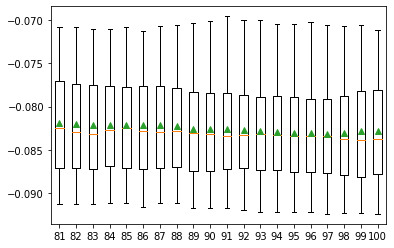

In [38]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# define number of features to evaluate
num_features = [i for i in range(X.shape[1]-19,X.shape[1]+1)]
# enumerate each number of features
results = list()
for k in num_features:
  # create pipeline
  model = LinearRegression()
  fs=SelectKBest(score_func=mutual_info_regression, k=k)
  pipeline = Pipeline(steps=[('sel',fs),('lr',model)])
  # evaluate the model
  cv= RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores=cross_val_score(pipeline,X,y,scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
  results.append(scores)
  # summarize the results
  print('>%d %.3f (%.3f)' %(k, mean(scores),std(scores)))
# plot model perforamnce for comparison
pyplot.boxplot(results, labels=num_features, showmeans=True)
pyplot.show()